## Data Cleaning
Read the preprocessed data in the CSV file and do the following:
- Check missing values
- Remove duplicate values based on a subset of columns
- Remove rows with bedrooms >= 6
- Remove rows where bedrooms or price == 0 
- drop category column because all of these are house category
- Check outliers


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as ss
from sklearn.model_selection import train_test_split

import sys
sys.path.append('../src')

In [43]:
# Read csv file to dataframe
df = pd.read_csv("../data/csv/lamudi_house_region.csv")
df.head()

,Category,Title,Price,Region,Bedrooms,Floor Area,Lot Area,URL,Image Link,Barangay,Town/City,Longitude,Latitude
0,house,Brand New Single House And Lot In BF Resort Wi...,11800000,Metro Manila,4,222,96,https://www.lamudi.com.ph/brand-new-single-hou...,https://static-ph.lamudi.com/static/media/bm9u...,Talon Dos,Las Piñas,120.985214,14.438526
1,house,2 Storey Spacious Townhouse For Sale in BF Res...,8800000,Metro Manila,4,189,120,https://www.lamudi.com.ph/2-storey-spacious-to...,https://static-ph.lamudi.com/static/media/bm9u...,Talon Dos,Las Piñas,120.994250,14.432780
2,house,Reasonable price brand new single attached hou...,7200000,Metro Manila,4,128,120,https://www.lamudi.com.ph/reasonable-price-bra...,https://static-ph.lamudi.com/static/media/bm9u...,Pilar,Las Piñas,121.008940,14.424650
3,house,Spectacular PRIME LOCATION Modern 3 Storey hou...,10758000,Metro Manila,4,216,105,https://www.lamudi.com.ph/spectacular-prime-lo...,https://static-ph.lamudi.com/static/media/bm9u...,Pilar,Las Piñas,121.008014,14.417168
4,house,Brand New House And Lot In Bf Resort With Mode...,9650000,Metro Manila,4,120,85,https://www.lamudi.com.ph/brand-new-house-and-...,https://static-ph.lamudi.com/static/media/bm9u...,Talon Dos,Las Piñas,120.985214,14.438526


### Remove null values

In [44]:
def clean_data(df):
    # Remove null values
    df = df.dropna()

    # Remove category column
    df = df.drop(columns=['Category'])

    # Remove duplicate rows
    df = df.drop_duplicates(subset=['Price', 'Bedrooms', 'Floor Area','Lot Area','Barangay','Town/City','Longitude','Latitude'])

    # Remove data with bedrooms >= 6
    df = df[df['Bedrooms'] < 6]

    # Remove data with bedrooms = 0
    df = df[df['Bedrooms'] > 0]

    # Remove price that are 0
    df = df[df['Price'] > 0]

    # Remove data with floor area = 0
    df = df[df['Floor Area'] > 0]

    # Remove data with lot area = 0
    df = df[df['Lot Area'] > 0]

    return df

In [45]:
# Check null values
df.isnull().sum()

Category       0
Title          0
Price          0
Region         0
Bedrooms       0
Floor Area     0
Lot Area       0
URL            0
Image Link     0
Barangay      28
Town/City      0
Longitude      0
Latitude       0
dtype: int64

In [46]:
# Shape before cleaning
df.shape

(2670, 13)

In [47]:
df_clean = clean_data(df.copy())
df_clean.shape

(1698, 12)

In [48]:
df_clean['Bedrooms'].unique()

array([4, 3, 5, 2, 1])

In [49]:
df_clean.describe()

,Price,Bedrooms,Floor Area,Lot Area,Longitude,Latitude
count,1.698000e+03,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000
mean,1.987521e+07,3.416372,180.787397,179.025324,121.150999,14.235381
std,3.991493e+07,1.002832,152.951836,219.451846,0.749334,1.251658
min,5.300000e+05,1.000000,22.000000,19.000000,118.712172,6.477294
25%,5.452118e+06,3.000000,75.000000,80.000000,120.985214,14.303545
50%,9.500000e+06,3.000000,138.000000,115.000000,121.024580,14.438526
75%,1.828750e+07,4.000000,237.750000,192.000000,121.104465,14.617770
max,4.500000e+08,5.000000,1600.000000,4390.000000,125.810526,17.058766


## Exploratory Data Analysis
- Add price per sqm column

### Add new column, price per sqm

In [50]:
# New column price per sqm
df_feat_engr = df_clean.copy()
df_feat_engr['price_per_sqm'] = df_feat_engr['Price'] / df_feat_engr['Lot Area']
df_feat_engr.head()

,Title,Price,Region,Bedrooms,Floor Area,Lot Area,URL,Image Link,Barangay,Town/City,Longitude,Latitude,price_per_sqm
0,Brand New Single House And Lot In BF Resort Wi...,11800000,Metro Manila,4,222,96,https://www.lamudi.com.ph/brand-new-single-hou...,https://static-ph.lamudi.com/static/media/bm9u...,Talon Dos,Las Piñas,120.985214,14.438526,122916.666667
1,2 Storey Spacious Townhouse For Sale in BF Res...,8800000,Metro Manila,4,189,120,https://www.lamudi.com.ph/2-storey-spacious-to...,https://static-ph.lamudi.com/static/media/bm9u...,Talon Dos,Las Piñas,120.994250,14.432780,73333.333333
2,Reasonable price brand new single attached hou...,7200000,Metro Manila,4,128,120,https://www.lamudi.com.ph/reasonable-price-bra...,https://static-ph.lamudi.com/static/media/bm9u...,Pilar,Las Piñas,121.008940,14.424650,60000.000000
3,Spectacular PRIME LOCATION Modern 3 Storey hou...,10758000,Metro Manila,4,216,105,https://www.lamudi.com.ph/spectacular-prime-lo...,https://static-ph.lamudi.com/static/media/bm9u...,Pilar,Las Piñas,121.008014,14.417168,102457.142857
4,Brand New House And Lot In Bf Resort With Mode...,9650000,Metro Manila,4,120,85,https://www.lamudi.com.ph/brand-new-house-and-...,https://static-ph.lamudi.com/static/media/bm9u...,Talon Dos,Las Piñas,120.985214,14.438526,113529.411765


### Handle outliers in Town/City and Region column

In [51]:
# check number of unique towns and cities
print("Number of unique towns/cities: ", len(df_feat_engr['Town/City'].unique()))
print("Number of unique barangay: ", len(df_feat_engr['Barangay'].unique()))
print("Number of unique regions: ", len(df_feat_engr['Region'].unique()))

Number of unique towns/cities:  108
Number of unique barangay:  375
Number of unique regions:  29


> **Having a combination of Barangay and Town/City together will not give us enough data set to train. So I decided to just use Town/City and Region instead**

In [52]:
# Check the number of properties in each town/city
location_stats_town_region = df_feat_engr.groupby(['Town/City','Region'])['Town/City'].agg('count').sort_values(ascending=False)
location_stats_town_region

Town/City     Region       
Las Piñas     Metro Manila     330
Quezon City   Metro Manila     201
Antipolo      Rizal            100
Parañaque     Metro Manila      99
Calamba       Laguna            56
                              ... 
Hermosa       Bataan             1
Pulilan       Bulacan            1
Canaman       Camarines Sur      1
San Fernando  La Union           1
Guiguinto     Bulacan            1
Name: Town/City, Length: 113, dtype: int64

In [53]:
# Check for outliers in the data
town_region_less_than_10 = location_stats_town_region[location_stats_town_region<=10]
town_region_less_than_10

Town/City     Region       
Santa Rosa    Laguna           10
Alaminos      Laguna           10
Cebu          Cebu             10
Porac         Pampanga          9
Davao         Davao del Sur     9
                               ..
Hermosa       Bataan            1
Pulilan       Bulacan           1
Canaman       Camarines Sur     1
San Fernando  La Union          1
Guiguinto     Bulacan           1
Name: Town/City, Length: 77, dtype: int64

In [54]:
len(location_stats_town_region[location_stats_town_region>10])

36

In [55]:
# Remove the rows that are in town_region_less_than_10 
# Create a multi-level boolean mask
mask = df_feat_engr.set_index(['Town/City', 'Region']).index.isin(town_region_less_than_10.index)

# Apply the mask to filter the rows
df_feat_engr_filtered = df_feat_engr[~mask]
df_feat_engr_filtered.shape

(1441, 13)

### Numerical values

In [56]:
numerical_features = ['Price','Floor Area','Lot Area','price_per_sqm','Bedrooms']

In [57]:
df_numerical = df_feat_engr_filtered[numerical_features]
df_numerical.head()

,Price,Floor Area,Lot Area,price_per_sqm,Bedrooms
0,11800000,222,96,122916.666667,4
1,8800000,189,120,73333.333333,4
2,7200000,128,120,60000.000000,4
3,10758000,216,105,102457.142857,4
4,9650000,120,85,113529.411765,4


#### Heatmap correlation of numerical features

<Axes: >

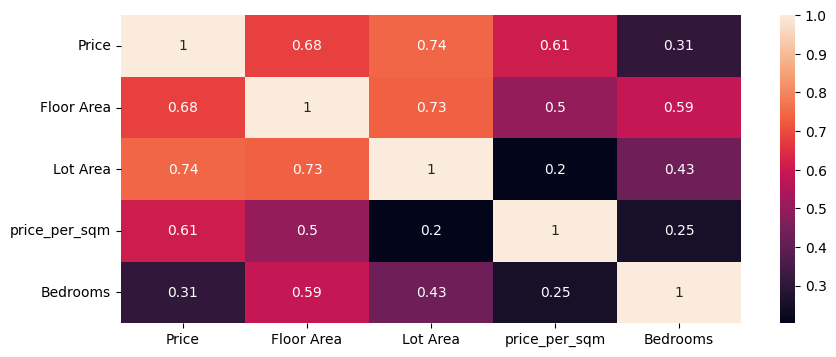

In [58]:
matplotlib.rcParams['figure.figsize'] = (10, 4)
sns.heatmap(df_numerical.corr(),annot=True)

- bedrooms has the lowest correlation with price, lot area has the highest correlation with price
- Bedrooms is highly correlated with floor area
- Floor area is highly correlated with Lot Area \
Can we then drop the floor area?

### Categorical features

In [59]:
categorical_features = ['Town/City','Region']

#### Cramer's correlation

In [60]:
def cramers_corrected_stat(df,cat_col1,cat_col2):
    """
    This function spits out corrected Cramer's correlation statistic
    between two categorical columns of a dataframe 
    """
    crosstab = pd.crosstab(df[cat_col1],df[cat_col2])
    chi_sqr = ss.chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    r,k = crosstab.shape
    phi_sqr_corr = max(0, chi_sqr/n - ((k-1)*(r-1))/(n-1))    
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    
    result = np.sqrt(phi_sqr_corr / min( (k_corr-1), (r_corr-1)))
    return round(result,3)

In [61]:
cramer_v_corr = dict(
    zip(
        categorical_features,
        [[cramers_corrected_stat(df_feat_engr_filtered,f1,f2) for f2 in categorical_features]
         for f1 in categorical_features]
    )
)
cramer_v_corr

{'Town/City': [1.0, 0.986], 'Region': [0.986, 1.0]}

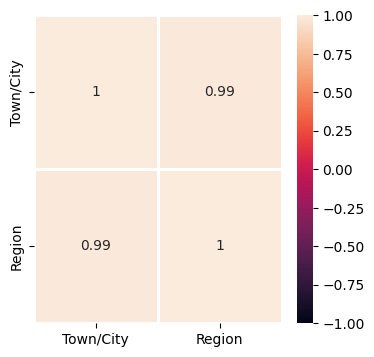

In [62]:
plt.figure(figsize=(4,4),dpi=100)
sns.heatmap(data=pd.DataFrame(data=cramer_v_corr,index=categorical_features),
            # cmap='magma',
            # linecolor='white',
            linewidth=1,
            annot=True,
            vmin=-1,
            vmax=1
           );

### Correlation between Numerical and Categorical features

In [63]:
def anova_pvalue(df,cat_col,num_col):
    """
    This function spits out the anova p-value (probability of no correlation) 
    between a categorical column and a numerical column of a dataframe
    """
    CategoryGroupLists = df.groupby(cat_col)[num_col].apply(list)
    AnovaResults = ss.f_oneway(*CategoryGroupLists)
    p_value = round(AnovaResults[1],3)
    return p_value

if p_value < 0.05, there is a correlation. Else, there is no correlation

In [64]:
anova_pvalue_dict = dict(
    zip(
        numerical_features,
        [[anova_pvalue(df_feat_engr_filtered,f1,f2) for f2 in numerical_features] 
         for f1 in categorical_features]
    )
)
anova_pvalue_dict

{'Price': [0.0, 0.0, 0.0, 0.0, 0.0], 'Floor Area': [0.0, 0.0, 0.0, 0.0, 0.0]}

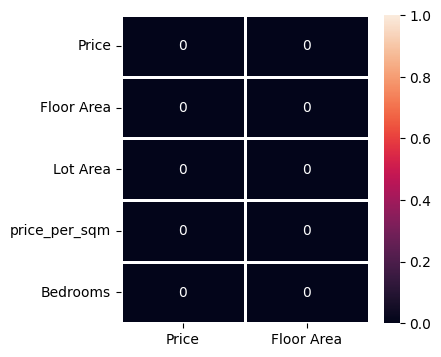

In [65]:
plt.figure(figsize=(4,4),dpi=100)
sns.heatmap(data=pd.DataFrame(data=anova_pvalue_dict,index=numerical_features),
            # cmap='viridis',
            # linecolor='white',
            linewidth=1,
            annot=True,
            vmin=0,
            vmax=1
           );

***Comment: p_value in all the cases < 0.05 implying likely correlation between categorical and numerical features***

/Users/nadine/anaconda3/envs/final_project/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



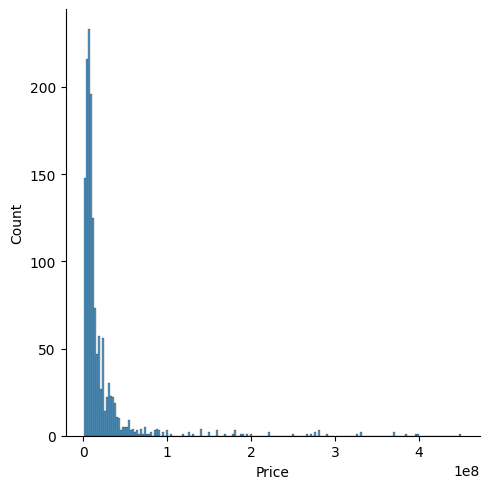

In [66]:
sns.displot(x='Price', data=df_feat_engr_filtered)

/Users/nadine/anaconda3/envs/final_project/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



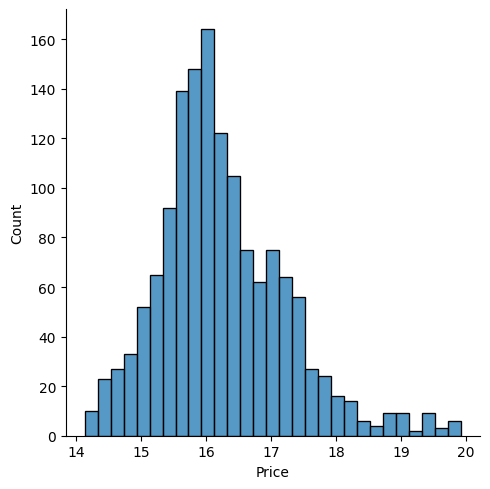

In [67]:
sns.displot(np.log1p(df_feat_engr_filtered['Price']))

/Users/nadine/anaconda3/envs/final_project/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



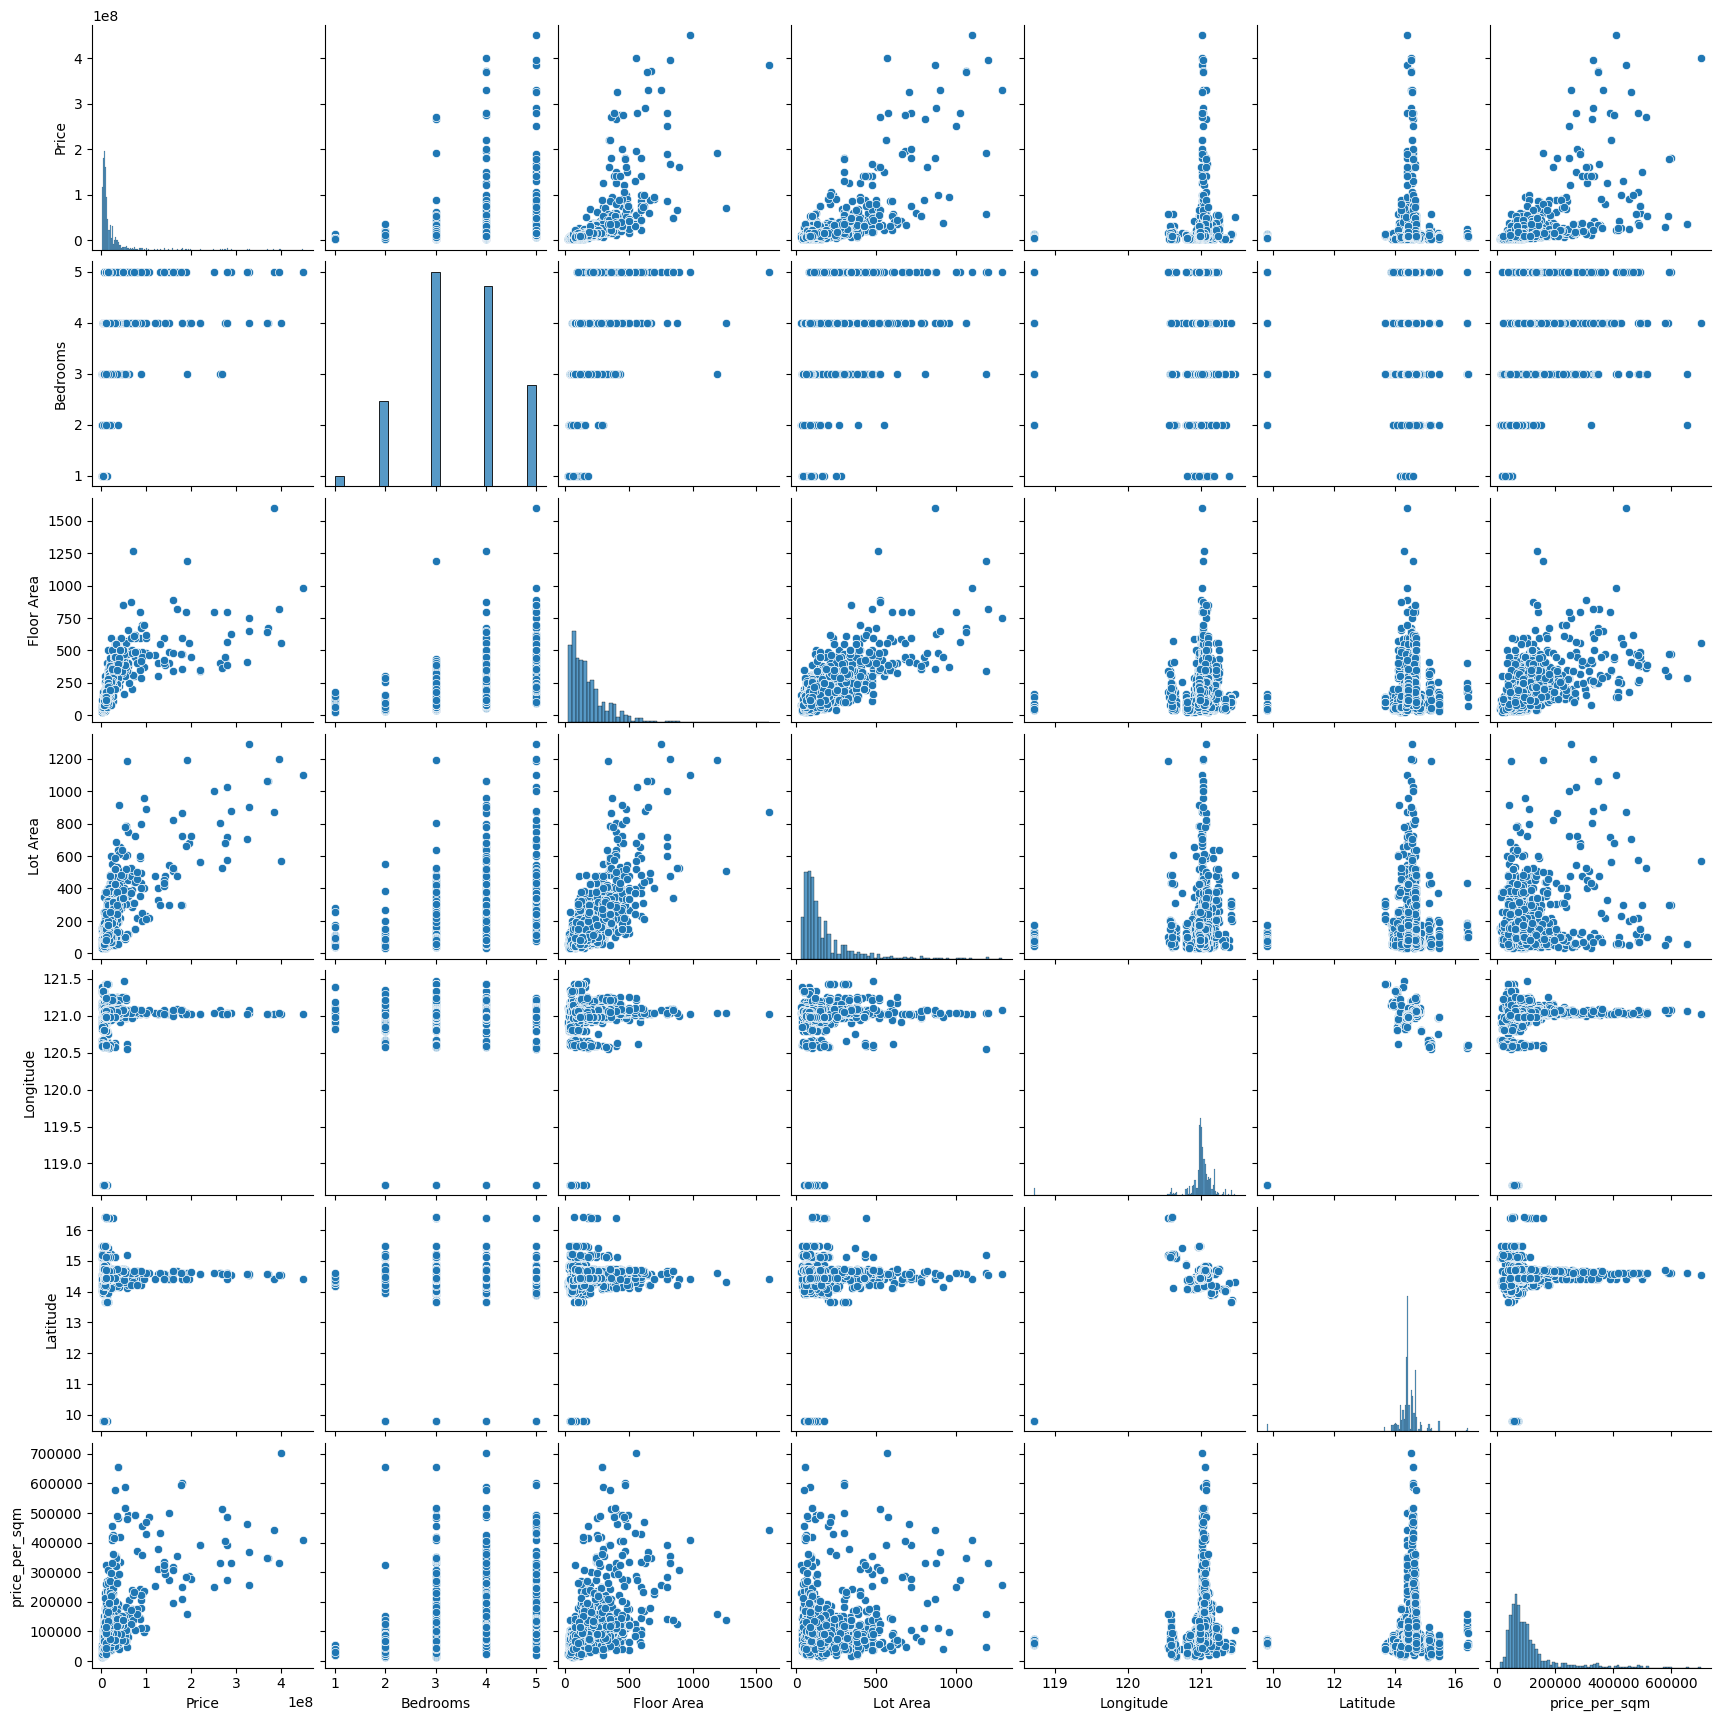

In [68]:
sns.pairplot(df_feat_engr_filtered)

### Histogram of price per sqm
- It can be seen that majority of the data have price per sqm between 50,000 to 100,000

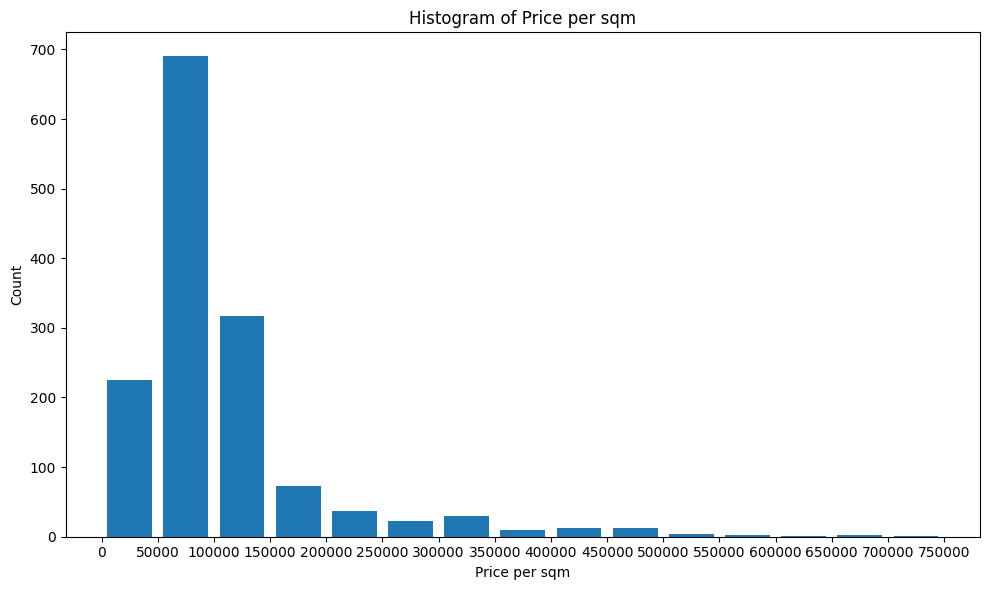

In [69]:
bin_width = 50000
tick_interval = 50000

# Create the histplot
plt.figure(figsize=(10, 6))
plt.hist(data=df_feat_engr_filtered, x='price_per_sqm',rwidth=0.8, bins=range(0, int(df_feat_engr_filtered['price_per_sqm'].max()) + bin_width, bin_width))

# Set the x-axis ticks and labels
plt.xticks(range(0, int(df_feat_engr_filtered['price_per_sqm'].max()) + bin_width, tick_interval))

# Add labels and title
plt.xlabel('Price per sqm')
plt.ylabel('Count')
plt.title('Histogram of Price per sqm')
plt.tight_layout()

# Show the plot
plt.show()

In [86]:
# add log price in dataframe
df_feat_engr_filtered['Price_log'] = np.log(df_feat_engr_filtered['Price'])

### Top Town/Cities and Region with the highest price per sqm

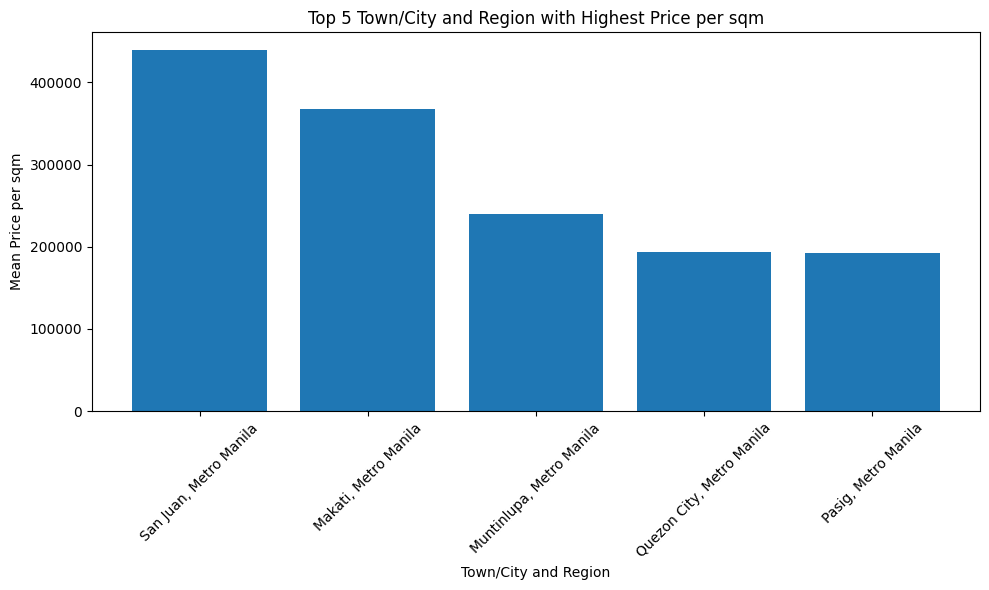

In [70]:
# Calculate the mean and standard deviation of price per sqm for each Town/City and Region combination
stats_by_town_region = df_feat_engr_filtered.groupby(['Town/City', 'Region'])['price_per_sqm'].agg(['mean', 'std'])

# Sort the Town/City and Region combinations by mean price per sqm in descending order
top_town_regions = stats_by_town_region.sort_values(by='mean', ascending=False).head(5)

# Create a bar plot for the top 5 Town/City and Region combinations with mean price per sqm and error bars representing the standard deviation
plt.figure(figsize=(10, 6))
x_values = range(len(top_town_regions))
plt.bar(x_values, top_town_regions['mean'])
plt.xticks(x_values, [f"{town}, {region}" for (town, region) in top_town_regions.index], rotation=45)
plt.xlabel('Town/City and Region')
plt.ylabel('Mean Price per sqm')
plt.title('Top 5 Town/City and Region with Highest Price per sqm')
plt.tight_layout()

plt.show()


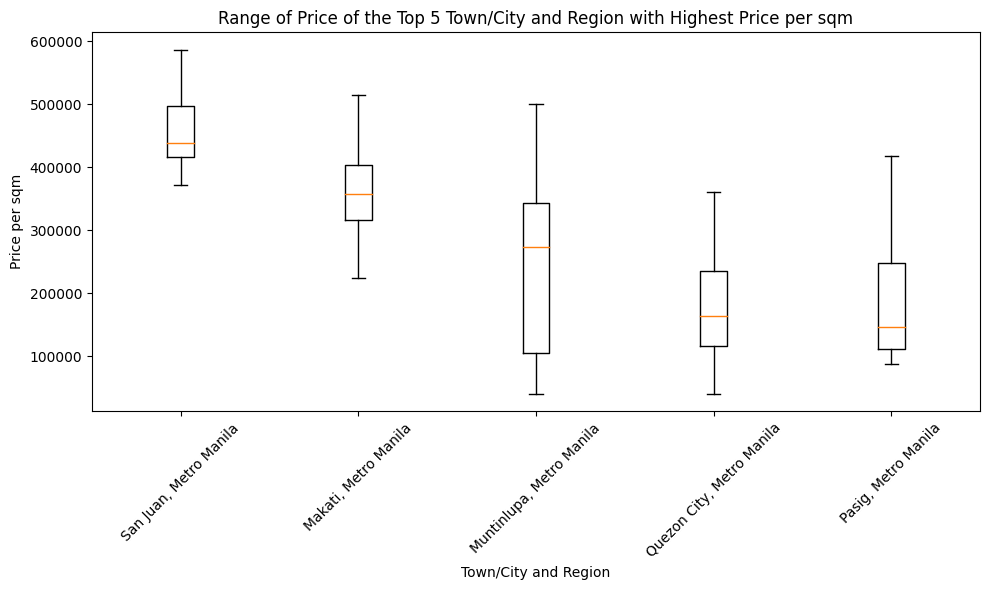

In [71]:
# Calculate the mean price per sqm for each Town/City and Region combination
mean_price_per_sqm = df_feat_engr_filtered.groupby(['Town/City', 'Region'])['price_per_sqm'].mean()

# Sort the Town/City and Region combinations by mean price per sqm in descending order
top_town_regions = mean_price_per_sqm.sort_values(ascending=False).head(5)

# Plot the top 5 Town/City and Region combinations with mean price per sqm and range
plt.figure(figsize=(10, 6))
positions = range(1, len(top_town_regions) + 1)  # Create positions for each Town/City and Region combination
for position, (town_city, region) in zip(positions, top_town_regions.index):
    town_region_data = df_feat_engr_filtered[(df_feat_engr_filtered['Town/City'] == town_city) & (df_feat_engr_filtered['Region'] == region)]['price_per_sqm']
    plt.boxplot(town_region_data, positions=[position], showfliers=False)
    # plt.text(position, town_region_data.max(), f"Range: {town_region_data.min():.0f}-{town_region_data.max():.0f}", ha='center', va='bottom', color='blue')

plt.xticks(positions, [f"{town}, {region}" for (town, region) in top_town_regions.index], rotation=45)
plt.xlabel('Town/City and Region')
plt.ylabel('Price per sqm')
plt.title('Range of Price of the Top 5 Town/City and Region with Highest Price per sqm')
plt.tight_layout()
plt.show()

### Top Town/Cities and Region with the lowest price per sqm

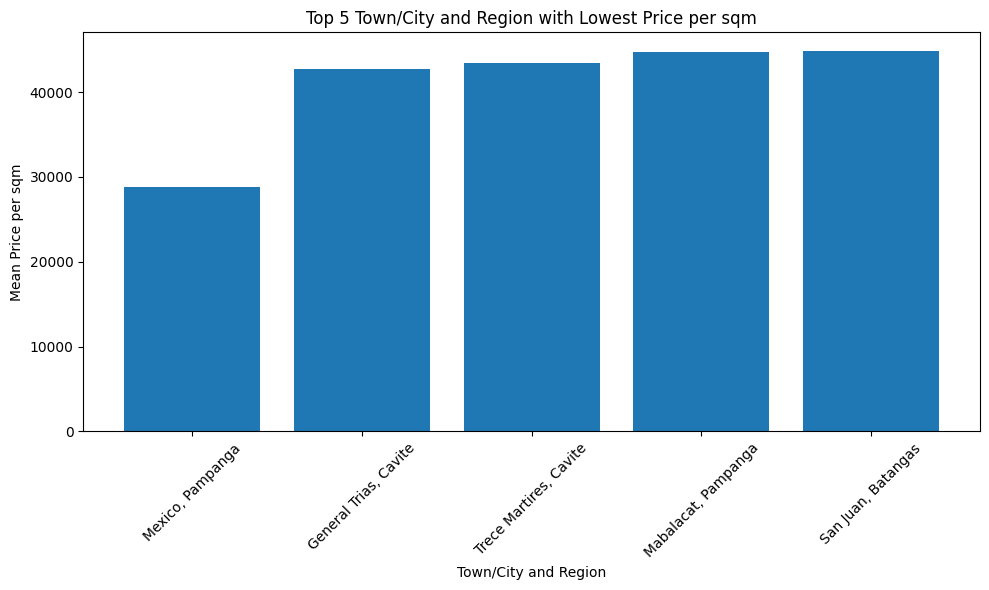

In [72]:
# Calculate the mean and standard deviation of price per sqm for each Town/City and Region combination
stats_by_town_region = df_feat_engr_filtered.groupby(['Town/City', 'Region'])['price_per_sqm'].agg(['mean', 'std'])

# Sort the Town/City and Region combinations by mean price per sqm in descending order
top_town_regions = stats_by_town_region.sort_values(by='mean', ascending=True).head(5)

# Create a bar plot for the top 5 Town/City and Region combinations with mean price per sqm and error bars representing the standard deviation
plt.figure(figsize=(10, 6))
x_values = range(len(top_town_regions))
plt.bar(x_values, top_town_regions['mean'])
plt.xticks(x_values, [f"{town}, {region}" for (town, region) in top_town_regions.index], rotation=45)
plt.xlabel('Town/City and Region')
plt.ylabel('Mean Price per sqm')
plt.title('Top 5 Town/City and Region with Lowest Price per sqm')
plt.tight_layout()

plt.show()

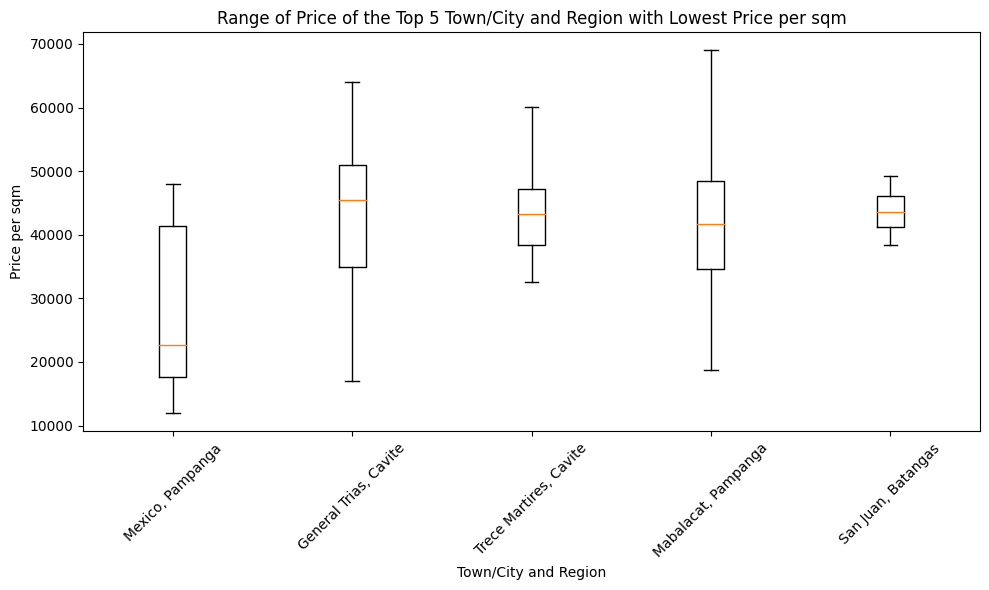

In [73]:
# Calculate the mean price per sqm for each Town/City and Region combination
mean_price_per_sqm = df_feat_engr_filtered.groupby(['Town/City', 'Region'])['price_per_sqm'].mean()

# Sort the Town/City and Region combinations by mean price per sqm in descending order
top_town_regions = mean_price_per_sqm.sort_values(ascending=True).head(5)

# Plot the top 5 Town/City and Region combinations with mean price per sqm and range
plt.figure(figsize=(10, 6))
positions = range(1, len(top_town_regions) + 1)  # Create positions for each Town/City and Region combination
for position, (town_city, region) in zip(positions, top_town_regions.index):
    town_region_data = df_feat_engr_filtered[(df_feat_engr_filtered['Town/City'] == town_city) & (df_feat_engr_filtered['Region'] == region)]['price_per_sqm']
    plt.boxplot(town_region_data, positions=[position], showfliers=False)
    # plt.text(position, town_region_data.max(), f"Range: {town_region_data.min():.0f}-{town_region_data.max():.0f}", ha='center', va='bottom', color='blue')

plt.xticks(positions, [f"{town}, {region}" for (town, region) in top_town_regions.index], rotation=45)
plt.xlabel('Town/City and Region')
plt.ylabel('Price per sqm')
plt.title('Range of Price of the Top 5 Town/City and Region with Lowest Price per sqm')
plt.tight_layout()
plt.show()

In [87]:
df_feat_engr_filtered.to_csv('../data/csv/cleaned_data.csv', index=False)

In [75]:
df_feat_engr_filtered = pd.read_csv("../data/csv/cleaned_data.csv")

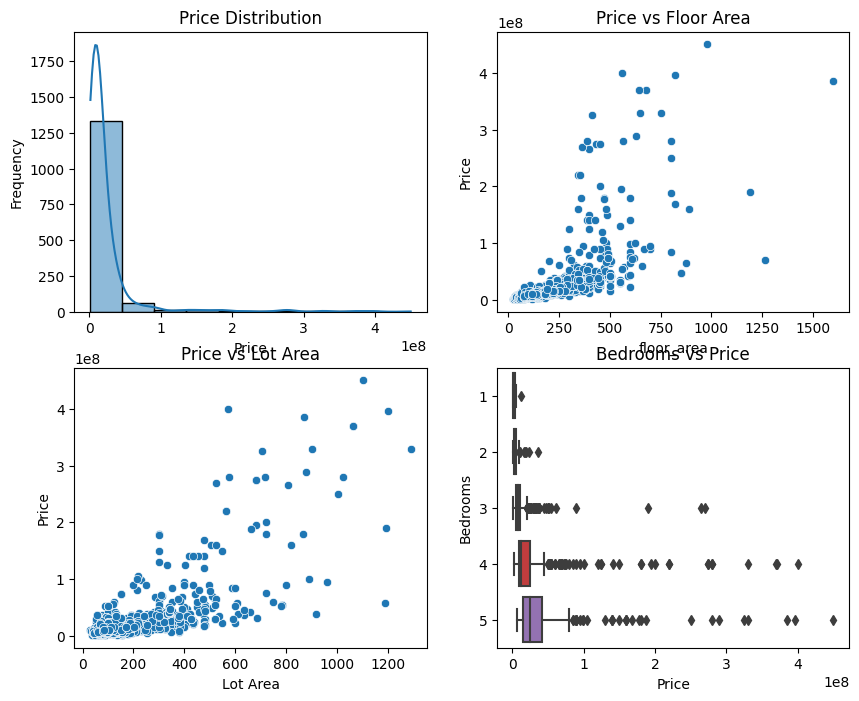

In [76]:
# Plot 1: Price distribution
fig1, ax = plt.subplots(2,2,figsize=(10, 8),squeeze=False)
sns.histplot(data=df_feat_engr_filtered, x="Price", bins=10, kde=True, ax=ax[0,0])
ax[0,0].set_title("Price Distribution")
ax[0,0].set_xlabel("Price")
ax[0,0].set_ylabel("Frequency")


# Plot 2: Price vs Floor Area
# fig2, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df_feat_engr_filtered, x="Floor Area", y="Price", ax=ax[0,1])
ax[0,1].set_title("Price vs Floor Area")
ax[0,1].set_xlabel("floor_area")
ax[0,1].set_ylabel("Price")

# # Plot 3: Price vs Lot Area
# fig3, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df_feat_engr_filtered, x="Lot Area", y="Price", ax=ax[1,0])
ax[1,0].set_title("Price vs Lot Area")
ax[1,0].set_xlabel("Lot Area")
ax[1,0].set_ylabel("Price")
# st.pyplot(fig3)

# fig4, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df_feat_engr_filtered, x="Price", y="Bedrooms", orient="h", ax=ax[1,1])
ax[1,1].set_title("Bedrooms vs Price")
ax[1,1].set_xlabel("Price")
ax[1,1].set_ylabel("Bedrooms")


plt.show()

In [77]:
import json
ph_regions = json.load(open("../data/json/philippines-with-regions_.geojson"))
ph_regions['features'][0]

{'type': 'Feature',
 'id': '10573',
 'properties': {'name': 'Abra',
  'density': 0,
  'path': '/world/Philippines/Abra'},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[121.003708, 17.851669],
     [121.099792, 17.824209],
     [121.110191, 17.560869],
     [120.998009, 17.49139],
     [120.994423, 17.408739],
     [120.897667, 17.1908],
     [120.694687, 17.160561],
     [120.667351, 17.19393],
     [120.682648, 17.25573],
     [120.614288, 17.310699],
     [120.557953, 17.307779],
     [120.539948, 17.34898],
     [120.585564, 17.47625],
     [120.468079, 17.49403],
     [120.505989, 17.648821],
     [120.581833, 17.79925],
     [120.69017, 17.8349],
     [120.727547, 17.892891],
     [120.833237, 17.95998],
     [120.909737, 17.950581],
     [120.927834, 17.978069],
     [120.967949, 17.95706],
     [121.003708, 17.851669]]]]}}

In [78]:
ph_regions['features'][0].keys()

dict_keys(['type', 'id', 'properties', 'geometry'])

In [79]:
ph_regions['features'][1]['id']

'10549'

In [80]:
df_feat_engr_filtered.head()

,Title,Price,Region,Bedrooms,Floor Area,Lot Area,URL,Image Link,Barangay,Town/City,Longitude,Latitude,price_per_sqm
0,Brand New Single House And Lot In BF Resort Wi...,11800000,Metro Manila,4,222,96,https://www.lamudi.com.ph/brand-new-single-hou...,https://static-ph.lamudi.com/static/media/bm9u...,Talon Dos,Las Piñas,120.985214,14.438526,122916.666667
1,2 Storey Spacious Townhouse For Sale in BF Res...,8800000,Metro Manila,4,189,120,https://www.lamudi.com.ph/2-storey-spacious-to...,https://static-ph.lamudi.com/static/media/bm9u...,Talon Dos,Las Piñas,120.994250,14.432780,73333.333333
2,Reasonable price brand new single attached hou...,7200000,Metro Manila,4,128,120,https://www.lamudi.com.ph/reasonable-price-bra...,https://static-ph.lamudi.com/static/media/bm9u...,Pilar,Las Piñas,121.008940,14.424650,60000.000000
3,Spectacular PRIME LOCATION Modern 3 Storey hou...,10758000,Metro Manila,4,216,105,https://www.lamudi.com.ph/spectacular-prime-lo...,https://static-ph.lamudi.com/static/media/bm9u...,Pilar,Las Piñas,121.008014,14.417168,102457.142857
4,Brand New House And Lot In Bf Resort With Mode...,9650000,Metro Manila,4,120,85,https://www.lamudi.com.ph/brand-new-house-and-...,https://static-ph.lamudi.com/static/media/bm9u...,Talon Dos,Las Piñas,120.985214,14.438526,113529.411765


In [81]:
region_map ={}
for feature in ph_regions['features']:
    feature['id'] = feature['id']
    region_name = "Metro Manila" if feature['properties']['name']=="Metropolitan Manila" else feature['properties']['name']
    region_map[region_name]=feature['id']

In [82]:
region_map

{'Abra': '10573',
 'Agusan del Norte': '10549',
 'Agusan del Sur': '10558',
 'Aklan': '10576',
 'Albay': '10537',
 'Antique': '10577',
 'Apayao': '10559',
 'Aurora': '10534',
 'Basilan': '10579',
 'Bataan': '10555',
 'Batanes': '10535',
 'Batangas': '10583',
 'Benguet': '10530',
 'Biliran': '10569',
 'Bohol': '10585',
 'Bukidnon': '10567',
 'Bulacan': '10529',
 'Cagayan': '10586',
 'Camarines Norte': '10575',
 'Camarines Sur': '10547',
 'Camiguin': '10570',
 'Capiz': '10578',
 'Catanduanes': '10538',
 'Cavite': '10571',
 'Cebu': '10588',
 'Compostela Valley': '10543',
 'Davao del Norte': '10584',
 'Davao del Sur': '10581',
 'Davao Oriental': '10566',
 'Dinagat Islands': '10587',
 'Eastern Samar': '10590',
 'Guimaras': '10591',
 'Ifugao': '10564',
 'Ilocos Norte': '10532',
 'Ilocos Sur': '10536',
 'Iloilo': '10592',
 'Isabela': '10589',
 'Kalinga': '10556',
 'Laguna': '10582',
 'Lanao del Norte': '10565',
 'Lanao del Sur': '10554',
 'La Union': '10550',
 'Leyte': '10593',
 'Maguindanao'

In [83]:
df_feat_engr_filtered['id'] = df_feat_engr_filtered['Region'].apply(lambda x: region_map[x])
df_feat_engr_filtered.head()

,Title,Price,Region,Bedrooms,Floor Area,Lot Area,URL,Image Link,Barangay,Town/City,Longitude,Latitude,price_per_sqm,id
0,Brand New Single House And Lot In BF Resort Wi...,11800000,Metro Manila,4,222,96,https://www.lamudi.com.ph/brand-new-single-hou...,https://static-ph.lamudi.com/static/media/bm9u...,Talon Dos,Las Piñas,120.985214,14.438526,122916.666667,10562
1,2 Storey Spacious Townhouse For Sale in BF Res...,8800000,Metro Manila,4,189,120,https://www.lamudi.com.ph/2-storey-spacious-to...,https://static-ph.lamudi.com/static/media/bm9u...,Talon Dos,Las Piñas,120.994250,14.432780,73333.333333,10562
2,Reasonable price brand new single attached hou...,7200000,Metro Manila,4,128,120,https://www.lamudi.com.ph/reasonable-price-bra...,https://static-ph.lamudi.com/static/media/bm9u...,Pilar,Las Piñas,121.008940,14.424650,60000.000000,10562
3,Spectacular PRIME LOCATION Modern 3 Storey hou...,10758000,Metro Manila,4,216,105,https://www.lamudi.com.ph/spectacular-prime-lo...,https://static-ph.lamudi.com/static/media/bm9u...,Pilar,Las Piñas,121.008014,14.417168,102457.142857,10562
4,Brand New House And Lot In Bf Resort With Mode...,9650000,Metro Manila,4,120,85,https://www.lamudi.com.ph/brand-new-house-and-...,https://static-ph.lamudi.com/static/media/bm9u...,Talon Dos,Las Piñas,120.985214,14.438526,113529.411765,10562


In [84]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "browser"

fig = px.choropleth(df_feat_engr_filtered,locations='id',geojson=ph_regions,color="price_per_sqm",hover_name="Region",title="Price per sqm by Region")
fig.show()